###Review Sentiment Classification

###  Loading the dataset, concatenating title and body

In [ ]:
# used to show the warning messages
import warnings
#to suppress the warnings
warnings.filterwarnings("ignore")
import pandas as pd
main_df = pd.read_csv("Final_Parsed_Data.csv")

# Adding a column in the dataframe which concatenates the review's title and body.
main_df["combined data"] = "-"
main_df["combined data"] = main_df["Title"] + " " + main_df["Body"]
main_df.head()

,Year,Title,Rating,Body,Helpfulness percentage,combined data
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,Curiously awful Cola is by far my favorite dr...
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,What a ripe off - GIVE ME A BREAK Sorry but I...
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,"I wouldn't cook with it, but it may have medi..."
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,I can finally have soda again! I'd been heari...
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,"Tasty, plenty of seaweed. This is good, plain..."


###  Assigning a new class label based on ratings

In [ ]:
main_df["rating_class"] = "-"

#Distinguishing the sentiment as <=3 rating as a "Negative" sentiment and >3 as a "Positive" sentiment.
#The loc operator is used to index a portion of the dataframe
main_df.loc[main_df["Rating"]>3.0,"rating_class"] = "Positive"
main_df.loc[main_df["Rating"]<=3.0,"rating_class"] = "Negative"
main_df.to_csv("Final_Parsed_Additional_Data.csv",index=False)
main_df

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,Curiously awful Cola is by far my favorite dr...,Negative
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,What a ripe off - GIVE ME A BREAK Sorry but I...,Negative
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,"I wouldn't cook with it, but it may have medi...",Negative
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,I can finally have soda again! I'd been heari...,Positive
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,"Tasty, plenty of seaweed. This is good, plain...",Positive
...,...,...,...,...,...,...,...
9239,2021,TASTES GREAT! BUT KOOL-AID WORKS JUST THE SAME,3.0,"THIS PRODUCT TASTES GREAT, BUT THE SHIPPING AN...",95.833333,TASTES GREAT! BUT KOOL-AID WORKS JUST THE SA...,Negative
9240,2021,I am so disappointed with this company - buye...,1.0,After reading the reviews here stating that th...,100.000000,I am so disappointed with this company - buye...,Negative
9241,2021,Our Juniper Bonsai Tree died.,1.0,I had purchased the Juniper Bonsai Tree as a C...,3.636364,Our Juniper Bonsai Tree died. I had purchased...,Negative
9242,2021,mmmmm chips :),4.0,"Well there isn't much to say about these, you ...",94.444444,mmmmm chips :) Well there isn't much to say a...,Positive


In [ ]:
#Statistics to display the sentiment counts in the dataset.
print(main_df["rating_class"].value_counts())
main_df.head()

Positive    5199
Negative    4045
Name: rating_class, dtype: int64


,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,Curiously awful Cola is by far my favorite dr...,Negative
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,What a ripe off - GIVE ME A BREAK Sorry but I...,Negative
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,"I wouldn't cook with it, but it may have medi...",Negative
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,I can finally have soda again! I'd been heari...,Positive
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,"Tasty, plenty of seaweed. This is good, plain...",Positive


Text(0.5, 1.0, 'Number of Positive and Negative Reviews')

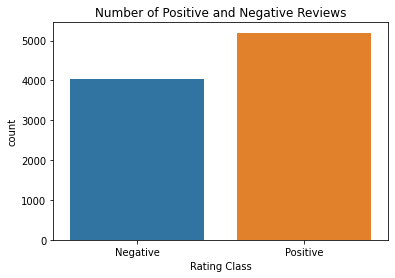

In [ ]:
#Python data visualization library based on matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# createing bar charts of the number of observations per category.
sns.countplot(main_df.rating_class)
plt.xlabel('Rating Class')
plt.title('Number of Positive and Negative Reviews')

### Data preprocessing

##### Installing required libraries for preprocessing of the data.

In [ ]:
!pip install contractions
!pip install nltk
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 11.5 MB/s 
     |████████████████████████████████| 287 kB 65.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 9.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=0a275d8b72270b70f494f5cdb640b4dc906a9a06395f6240035342a0d371ceb1
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


##### Importing the required libraries for preprocessing of the data.

In [ ]:
import string
import nltk
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##### Preprocessing

In [ ]:
#Function to split a paragraph into sentences.
def sent_tokens_func(text):
  return nltk.sent_tokenize(text)

#Function to split a given sentence into words.
def word_tokens_func(text):
  return nltk.word_tokenize(text)  

#Function to convert the text into Lowercase letters
def to_lower(text):
  if not isinstance(text,str):
    text = str(x)
  return text.lower()

#Function to omit the numbers from the text
def number_omit_func(text):
  output = ''.join(c for c in text if not c.isdigit())
  return output

#Function to omit the punctuation marks from the text
def remove_punctuation(text):
  return ''.join(c for c in text if c not in punctuation) 

#Function to remove the stopwords from the given text using nltk
def stopword_remove_func(sentence):
  stop_words = stopwords.words('english')
  return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words]) 

In [ ]:
main_df['combined data'].apply(sent_tokens_func) 
main_df['combined data'].apply(to_lower)

#Applying the stopword_remove_func function to remove the stopwords from the data in the "combined data" column
main_df['combined data'].apply(stopword_remove_func) 

0       Curiously awful Cola far favorite drink . My w...
1       What ripe - GIVE ME A BREAK Sorry I noodles be...
2       I would n't cook , may medicinal applications ...
3       I finally soda ! I 'd hearing Zevia finally go...
4       Tasty , plenty seaweed . This good , plain , s...
                              ...                        
9239    TASTES GREAT ! BUT KOOL-AID WORKS JUST THE SAM...
9240    I disappointed company - buyer BEWARE indeed A...
9241    Our Juniper Bonsai Tree died . I purchased Jun...
9242    mmmmm chips : ) Well n't much say , get bulk a...
9243    Who resist ? These real flashback ! And taste ...
Name: combined data, Length: 9244, dtype: object

In [ ]:
#Function to perform lemmatization for the text using WordNet Lemmatizer
def lemmatize(text):
          wordnet_lemmatizer = WordNetLemmatizer()
          lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
          return " ".join(lemmatized_word)

# Function to call other sub functions such as number_omit,remove_punctuation etc.,
def preprocess(text):
        lower_text = to_lower(text)
        sentence_tokens = sent_tokens_func(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = number_omit_func(lemmatizzed_sent)
            clean_text = remove_punctuation(clean_text)
            clean_text = stopword_remove_func(clean_text)
            word_tokens = word_tokens_func(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return " ".join(word_list)

In [ ]:
# Replacing the combined_data with the preprocessed_data
#This cell would take around 2 minutes to execute
sample_data = main_df['combined data']
sample_data = sample_data.apply(preprocess)
main_df['combined data'] = sample_data

In [ ]:
# Creating a Local Backup file of the preprocessed data
main_df.to_csv("Preprocessed_data.csv",index=False)
main_df.head()

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive


##### Generating a Wordcloud to visualize most frequent word used in the product reviews set.

In [ ]:
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt

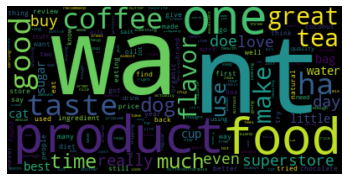

In [ ]:
l1 = main_df['combined data']
str1 = " ".join(l1)
l2 = str1.split(" ")
c1 = dict(Counter(l2))
c2 = dict(sorted(c1.items(), key=lambda item: item[1], reverse = True))
c2_30 = " ".join(list(c2.keys())[:200])

wordcloud = wordcloud.WordCloud().generate(c2_30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Building two binary classification models


#### Model 1: LSTM

##### Importing the Required libraries and preprocessed data to implement LSTM classifer.

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
main_df = pd.read_csv("Preprocessed_data.csv")
main_df

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive
...,...,...,...,...,...,...,...
9239,2021,TASTES GREAT! BUT KOOL-AID WORKS JUST THE SAME,3.0,"THIS PRODUCT TASTES GREAT, BUT THE SHIPPING AN...",95.833333,taste great koolaid work product taste great s...,Negative
9240,2021,I am so disappointed with this company - buye...,1.0,After reading the reviews here stating that th...,100.000000,disappointed company buyer beware indeed readi...,Negative
9241,2021,Our Juniper Bonsai Tree died.,1.0,I had purchased the Juniper Bonsai Tree as a C...,3.636364,juniper bonsai tree died purchased juniper bon...,Negative
9242,2021,mmmmm chips :),4.0,"Well there isn't much to say about these, you ...",94.444444,mmmmm chip well nt much say get bulk amount fr...,Positive


##### Label Encoding the Rating Class and splitting the data into training and testing

In [ ]:
combined_data_val = main_df["combined data"].values
rating_class_val = main_df["rating_class"].values

X = main_df["combined data"]
Y = main_df["rating_class"]
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

##### Tokenization

In [ ]:
#The num_words is a hyperparameter to refer to the number of words that needs to be retained based on the frequency of words in the dataset
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=200)

#####  Defining a LSTM model using Keras Library and adding the LSTM layers.

In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
max_words = 5000
max_len = 200
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

##### Building the LSTM model for Binary Classification.

In [ ]:

#increases the memory of recurrent neural networks.
#Training the LSTM model
#>-------------------------- Uncomment if necessary as training would take considerable amount of time, therefore stored as a pickle/json file ----------------------<
history = model.fit(sequences_matrix,Y_train,batch_size=32,epochs=25,validation_split=0.2)

Epoch 1/25
197/197 [==============================] - 28s 128ms/step - loss: 0.4891 - accuracy: 0.7725 - val_loss: 0.4255 - val_accuracy: 0.8263
Epoch 2/25
197/197 [==============================] - 23s 117ms/step - loss: 0.2911 - accuracy: 0.8888 - val_loss: 0.3602 - val_accuracy: 0.8594
Epoch 3/25
197/197 [==============================] - 23s 118ms/step - loss: 0.2283 - accuracy: 0.9181 - val_loss: 0.3611 - val_accuracy: 0.8556
Epoch 4/25
197/197 [==============================] - 24s 121ms/step - loss: 0.1843 - accuracy: 0.9314 - val_loss: 0.4181 - val_accuracy: 0.8454
Epoch 5/25
197/197 [==============================] - 23s 117ms/step - loss: 0.1443 - accuracy: 0.9461 - val_loss: 0.3617 - val_accuracy: 0.8626
Epoch 6/25
197/197 [==============================] - 23s 118ms/step - loss: 0.1041 - accuracy: 0.9656 - val_loss: 0.4544 - val_accuracy: 0.8607
Epoch 7/25
197/197 [==============================] - 23s 117ms/step - loss: 0.0793 - accuracy: 0.9720 - val_loss: 0.5117 - val_ac

In [ ]:
from keras.models import model_from_json
import warnings
warnings.filterwarnings("ignore")

#>-------------------------- Uncomment if necessary------------------------------<
# Saving the trained model by creating a JSON file to evaluate the Testing Accuarcy.

model_json = model.to_json()
with open("model_RNN_1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_RNN_1.h5")
print("Saved model to disk")


# Saving the trained model by creating a pickle file to evaluate the Training Accuracy and Validation Accuarcy.

filename = 'Finalized_model_Review_RNN_1.sav'
pickle.dump(history, open(filename, 'wb'))


Saved model to disk


INFO:tensorflow:Assets written to: ram://defa3906-8ea9-4e8f-a33b-0cb46a1980d4/assets


INFO:tensorflow:Assets written to: ram://defa3906-8ea9-4e8f-a33b-0cb46a1980d4/assets


In [ ]:
# loading the json model from disk and Evaluating the Accuarcy of Testing
json_file = open('model_RNN_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights into the new model
loaded_model.load_weights("model_RNN_1.h5")
print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# loading the pickle model from disk and Evaluating the Accuarcy of Training and Validation.
filename = 'Finalized_model_Review_RNN_1.sav'
loaded_model_pkl = pickle.load(open(filename, 'rb'))
print("Train Accuracy of the LSTM Model:",loaded_model_pkl.history['accuracy'][9])
print("Validation Accuracy of the LSTM Model:",loaded_model_pkl.history['val_accuracy'][9])

Loaded model from disk
Train Accuracy of the LSTM Model: 0.9928401112556458
Validation Accuracy of the LSTM Model: 0.8479644060134888


In [ ]:
#Creating Test sequence matrices for Evaluating the Test set
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#Evaluating the Testing set using the JSON model created
accr = loaded_model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 2s 27ms/step - loss: 1.9079 - accuracy: 0.8385


In [ ]:
print('Test set Evaluation:  Accuracy of the Test Set: {:0.3f}'.format(accr[1]))

Test set Evaluation:  Accuracy of the Test Set: 0.857


#### Model 2: Logistic Regression

##### Importing the Required Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

##### Reading the preprocessed data and encoding the rating class label

In [ ]:
#Reading the preprocessed data for second classifier-Logistic Regression
import pandas as pd
main_df = pd.read_csv("Preprocessed_data.csv")

#Encoding the Positive and Negative sentiments
main_df["rating_class_encoded"] = "-"
main_df.loc[main_df["rating_class"]=="Positive","rating_class_encoded"] = 1
main_df.loc[main_df["rating_class"]=="Negative","rating_class_encoded"] = 0

#Creating a Local Backup of the encoded file of Task2.4
main_df.to_csv("Final_data.csv",index=False)
main_df.head()

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class,rating_class_encoded
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative,0
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative,0
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative,0
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive,1
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive,1


##### Building the Logistic Regression model

In [ ]:
#Using the CountVectorizer to create matrix for the dependent and Independent Variable token counts

#min_df is initialized so as to ignore the terms with frequency less than the given threshold
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(main_df["combined data"])
y = main_df['rating_class_encoded']
y=y.astype('int')

In [ ]:
#Train_test_split in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=0) 

In [ ]:
#Building a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
#Predicting the sentiments using the model built in the previous step
y_pred=model.predict(x_test)

In [ ]:
#Metrics to display the Accuarcy of the Testing data
print ("Accuracy of the Logistic Regression model :", accuracy_score(y_test, y_pred))
probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])
print ("ROC-AUC Score of the Logistic Regression model :", roc_auc_score(y_test, probabilities[:, 1]))

Accuracy of the Logistic Regression model : 0.861211247296323
ROC-AUC Score of the Logistic Regression model : 0.9300833227727792


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("True Positives:",cm[0][0])
print("True Negatives:",cm[1][1])
print("False Negatives:",cm[0][1])
print("False Positives:",cm[1][0])

True Positives: 1035
True Negatives: 1354
False Negatives: 179
False Positives: 206


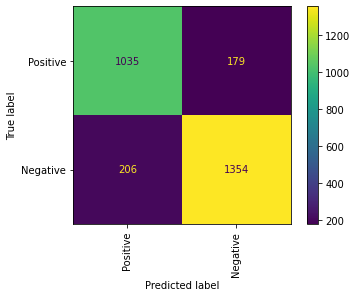

In [ ]:
#Constructing a confusion matrix to display the Evaluation metrics for the dataset using Logistic Regression.
plot_confusion_matrix(model, x_test, y_test, display_labels=['Positive', 'Negative'], cmap='viridis', xticks_rotation='vertical')

##### Hyperparameter Tuning of Logistic Regression:

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

logModel = LogisticRegression()
# Creating a parameter grid
param_grid = [{
     'penalty' : ['l1', 'l2'],
      'C' : np.logspace(-4, 4, 20),
     'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
     'max_iter':[1000],
     'random_state':[0]}
]

clf = GridSearchCV(logModel,param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
#Note that it would take around 2 minutes to fit the entire model.
clf.fit(x_train, y_train)
print ("Best score for the Logistic Regression model :", clf.best_score_)
print ("Best Parameters for tuned model :",clf.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best score for the Logistic Regression model : 0.8567233384853168
Best Parameters for tuned model : {'C': 0.23357214690901212, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}


In [ ]:
#Retaking the Hyperparameters from the Hyperparameter Tuning and training the model.
logreg = LogisticRegression(C = 0.233, penalty = 'l2',solver = 'liblinear',max_iter=1000,random_state=0)
logreg.fit(x_train,y_train)
y_pred1=logreg.predict(x_test)
print ("Accuracy of the Logistic Regression model :", accuracy_score(y_test, y_pred1))

Accuracy of the Logistic Regression model : 0.8626532083633742


In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print("True Positives:",cm[0][0])
print("True Negatives:",cm[1][1])
print("False Negatives:",cm[0][1])
print("False Positives:",cm[1][0])

True Positives: 1030
True Negatives: 1363
False Negatives: 184
False Positives: 197


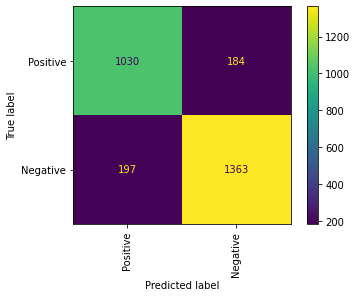

In [ ]:
#Constructing a confusion matrix to display the Evaluation metrics for the dataset using Logistic Regression.
plot_confusion_matrix(logreg, x_test, y_test, display_labels=['Positive', 'Negative'], cmap='viridis', xticks_rotation='vertical')

###  Comparing the Performance of the classification models

#### Evaluation:

The evaluation of the Review Sentiment Classification is carried out using the Accuracy evaluation metric from sklearn.           
As we can see from the above results,the Logistic Regression model is having an accuracy of 87% which can be considered as a good model for predicting the given Sentiments.              
The hyperparameter tuning for the Logistic Regression model has increased the True Positive count as can be seen in the Confusion matrix.            
In terms of Confusion matrix, the True Positive and True Negative Rate is very high which signifies that the model is correctly predicting the Positive and Negative sentiment for the dataset.                
This increase in TP and TN would ultimately increase the Precision,Recall and F1 score of the model.
Also, the LSTM is performing in par with the Logistic Regression as the dropout parameter has been initialized that reduced the overfitting and improved the model performance.    
Training and Testing accuracies are at par which signifies that the LSTM model is performing well for the given dataset.    


##  Review Helpfulness Classification**

### Assigning a Class label based on Helfulness Percentage

In [ ]:
import pandas as pd
main_df_help = pd.read_csv("Final_data.csv")
main_df_help.head()

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class,rating_class_encoded
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative,0
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative,0
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative,0
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive,1
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive,1


In [ ]:
#Appending a new column in the dataframe to distinguish between the Helpful and Unhelpful Reviews of the text.
main_df_help["helpful_info_class"] = "-"

#Distinguishing the helpfulness as <=59.9 percentage as a "Unhelpful" review and >=60.0 as a "Helpful" Review
main_df_help.loc[main_df_help["Helpfulness percentage"]>=60.0,"helpful_info_class"] = "Helpful"
main_df_help.loc[main_df_help["Helpfulness percentage"]<=59.9,"helpful_info_class"] = "Unhelpful"
main_df_help.to_csv("Preprocessed_Data.csv",index=False)

In [ ]:
#Raw statistics to display the helpful and Unhelpful review counts in the dataset.
main_df_help["helpful_info_class"].value_counts()

Helpful      7212
Unhelpful    2032
Name: helpful_info_class, dtype: int64

Text(0.5, 1.0, 'Number of Helpful and Unhelpful Reviews')

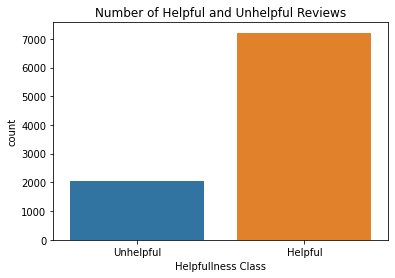

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(main_df_help.helpful_info_class)
plt.xlabel('Helpfullness Class')
plt.title('Number of Helpful and Unhelpful Reviews')

###  Building two binary classification models

#### Model 1: LSTM

##### Importing the Required libraries to implement LSTM classifer.

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
main_df_help=pd.read_csv("Preprocessed_Data.csv")
main_df_help

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class,rating_class_encoded,helpful_info_class
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative,0,Unhelpful
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative,0,Unhelpful
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative,0,Unhelpful
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive,1,Helpful
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive,1,Helpful
...,...,...,...,...,...,...,...,...,...
9239,2021,TASTES GREAT! BUT KOOL-AID WORKS JUST THE SAME,3.0,"THIS PRODUCT TASTES GREAT, BUT THE SHIPPING AN...",95.833333,taste great koolaid work product taste great s...,Negative,0,Helpful
9240,2021,I am so disappointed with this company - buye...,1.0,After reading the reviews here stating that th...,100.000000,disappointed company buyer beware indeed readi...,Negative,0,Helpful
9241,2021,Our Juniper Bonsai Tree died.,1.0,I had purchased the Juniper Bonsai Tree as a C...,3.636364,juniper bonsai tree died purchased juniper bon...,Negative,0,Unhelpful
9242,2021,mmmmm chips :),4.0,"Well there isn't much to say about these, you ...",94.444444,mmmmm chip well nt much say get bulk amount fr...,Positive,1,Helpful


##### Label Encoding the Rating Class and splitting the data into training and testing

In [ ]:
combined_data_val = main_df_help["combined data"].values
rating_class_val = main_df_help["helpful_info_class"].values

X = main_df_help["combined data"]
Y = main_df_help["helpful_info_class"]
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

##### Tokenization

In [ ]:
#The num_words is a hyperparameter to refer to the number of words that needs to be retained based on the frequency of words in the dataset
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=200)

#####  Defining a LSTM model using Keras Library and adding the LSTM layers.

In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
max_words = 5000
max_len = 200
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 50)           250000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

##### Building the LSTM model for Binary Classification.

In [ ]:
#Training the LSTM model
#>----------------- Uncomment if necessary as training would take considerable amount of time, therefore stored as a pickle/json file ----------------<
history = model.fit(sequences_matrix,Y_train,batch_size=32,epochs=25,validation_split=0.2)

Epoch 1/25
197/197 [==============================] - 28s 126ms/step - loss: 0.4580 - accuracy: 0.7992 - val_loss: 0.4306 - val_accuracy: 0.8181
Epoch 2/25
197/197 [==============================] - 24s 124ms/step - loss: 0.3450 - accuracy: 0.8578 - val_loss: 0.4180 - val_accuracy: 0.8282
Epoch 3/25
197/197 [==============================] - 25s 125ms/step - loss: 0.2848 - accuracy: 0.8875 - val_loss: 0.3649 - val_accuracy: 0.8511
Epoch 4/25
197/197 [==============================] - 24s 123ms/step - loss: 0.2407 - accuracy: 0.9082 - val_loss: 0.3880 - val_accuracy: 0.8346
Epoch 5/25
197/197 [==============================] - 24s 122ms/step - loss: 0.1969 - accuracy: 0.9235 - val_loss: 0.3990 - val_accuracy: 0.8333
Epoch 6/25
197/197 [==============================] - 24s 123ms/step - loss: 0.1605 - accuracy: 0.9379 - val_loss: 0.4213 - val_accuracy: 0.8327
Epoch 7/25
197/197 [==============================] - 24s 124ms/step - loss: 0.1283 - accuracy: 0.9515 - val_loss: 0.4745 - val_ac

In [ ]:
from keras.models import model_from_json
import warnings
warnings.filterwarnings("ignore")

#>-------------------------- Uncomment if necessary------------------------------<
# Saving the trained model by creating a JSON file to evaluate the Testing Accuarcy.

model_json = model.to_json()
with open("model_RNN_2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_RNN_2.h5")
print("Saved model to disk")


# Saving the trained model by creating a pickle file to evaluate the Training Accuracy and Validation Accuarcy.

filename = 'Finalized_model_Review_RNN_2.sav'
pickle.dump(history, open(filename, 'wb'))


Saved model to disk


INFO:tensorflow:Assets written to: ram://7d590783-e89b-4583-9263-6218ad17a38e/assets


INFO:tensorflow:Assets written to: ram://7d590783-e89b-4583-9263-6218ad17a38e/assets


In [ ]:
# loading the json model from disk and Evaluating the Accuarcy of Testing
json_file = open('model_RNN_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights into the new model
loaded_model.load_weights("model_RNN_2.h5")
print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# loading the pickle model from disk and Evaluating the Accuarcy of Training and Validation.
filename = 'Finalized_model_Review_RNN_2.sav'
loaded_model_pkl = pickle.load(open(filename, 'rb'))
print("Train Accuracy of the LSTM Model:",loaded_model_pkl.history['accuracy'][9])
print("Validation Accuracy of the LSTM Model:",loaded_model_pkl.history['val_accuracy'][9])

Loaded model from disk
Train Accuracy of the LSTM Model: 0.9788385033607483
Validation Accuracy of the LSTM Model: 0.8174300193786621


In [ ]:
#Creating Test sequence matrices for Evaluating the Test set
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#Evaluating the Testing set using the JSON model created
accr = loaded_model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 2s 25ms/step - loss: 1.8430 - accuracy: 0.8270


In [ ]:
print('Test set Evaluation:  Accuracy of the Test Set: {:0.4f}'.format(accr[1]))

Test set Evaluation:  Accuracy of the Test Set: 0.8226


#### Model 2: Decision Tree Classifier

##### Importing the Required Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

##### Loading the Required data and encoding the Helpfulness Information for binary classification.

In [ ]:
#Reading the preprocessed data for second classifier-Decision Tree
main_df_help = pd.read_csv("Preprocessed_Data.csv")

#Encoding the Helpful and Unhelpful Reviews
main_df_help["helpful_class_encoded"] = "-"
main_df_help.loc[main_df_help["helpful_info_class"]=="Helpful","helpful_class_encoded"] = 1
main_df_help.loc[main_df_help["helpful_info_class"]=="Unhelpful","helpful_class_encoded"] = 0

#Creating a Local Backup of the encoded file of Task3.2
main_df_help.to_csv("Final_data.csv",index=False)
main_df_help.head()

,Year,Title,Rating,Body,Helpfulness percentage,combined data,rating_class,rating_class_encoded,helpful_info_class,helpful_class_encoded
0,2016,Curiously awful,1.0,Cola is by far my favorite drink. My wife and ...,7.142857,curiously awful cola far favorite drink wife u...,Negative,0,Unhelpful,0
1,2016,What a ripe off - GIVE ME A BREAK,2.0,Sorry but I had these noodles and they are no ...,29.411765,ripe give break sorry noodle better cent versi...,Negative,0,Unhelpful,0
2,2016,"I wouldn't cook with it, but it may have medi...",3.0,I do not understand the people who say that th...,15.000000,would nt cook may medicinal application unders...,Negative,0,Unhelpful,0
3,2016,I can finally have soda again!,5.0,I'd been hearing about Zevia and finally got t...,97.142857,finally soda hearing zevia finally got try fla...,Positive,1,Helpful,1
4,2016,"Tasty, plenty of seaweed.",5.0,"This is good, plain, seaweed. 1.76 oz doesn't ...",100.000000,tasty plenty seaweed good plain seaweed oz doe...,Positive,1,Helpful,1


##### Building the Decision Tree model for Binary classification

In [ ]:
#Using the CountVectorizer to create matrix for the dependent and Independent Variable token counts

#min_df is initialized so as to ignore the terms with frequency less than the given threshold
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(main_df_help["combined data"])
y = main_df_help['helpful_class_encoded']
y=y.astype('int')

In [ ]:
#Train_test_split of the dataframe in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=0) 

In [ ]:
#Building a Decision Tree model to predict the helpfulness of the Review
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predicting the helpfulness using the model built in the previous step
y_pred=model.predict(x_test)

In [ ]:
#Metrics to display the Accuarcy of the Testing data
print ("Accuracy of the Decision Tree model :", accuracy_score(y_test, y_pred))

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])
print ("ROC-AUC Score of the Decision Tree model :", roc_auc_score(y_test, probabilities[:, 1]))

Accuracy of the Decision Tree model : 0.7945205479452054
ROC-AUC Score of the Decision Tree model : 0.7002409017908549


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("True Positives:",cm[0][0])
print("True Negatives:",cm[1][1])
print("False Negatives:",cm[0][1])
print("False Positives:",cm[1][0])

True Positives: 322
True Negatives: 1882
False Negatives: 288
False Positives: 282


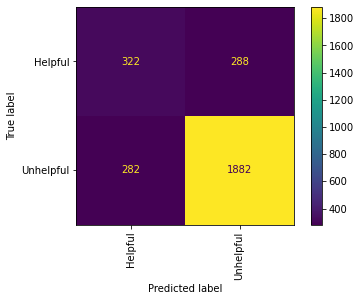

In [ ]:
#Constructing a confusion matrix to display the Evaluation metrics for the dataset using Decision Tree.
plot_confusion_matrix(model, x_test, y_test, display_labels=['Helpful','Unhelpful'], cmap='viridis', xticks_rotation='vertical')

##### Hyperparameter Tuning of Decision Tree:

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

dt = DecisionTreeClassifier()
# Creating a parameter grid
param_grid ={
    'criterion':['gini','entropy'], 'splitter':['best'], 'min_samples_split':[2,4,6], 'min_samples_leaf':[1],
}
clf = GridSearchCV(dt,param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1, scoring='accuracy')
#Note that it would take around 14 seconds to complete the fitting process.
clf.fit(x_train, y_train)
print ("Best score for the Decision Tree model :", clf.best_score_)
print ("Best Parameters for tuned model :",clf.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best score for the Decision Tree model : 0.7966004457162811
Best Parameters for tuned model : {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
#Retaking the Hyperparameters from the Hyperparameter Tuning and training the model.
dt_model= DecisionTreeClassifier(criterion= 'entropy', min_samples_split=2, min_samples_leaf =1)
dt_model.fit(x_train,y_train)
y_pred1=dt_model.predict(x_test)
print ("Accuracy of the Decision Tree Classifier :", accuracy_score(y_test, y_pred1))

Accuracy of the Decision Tree Classifier : 0.7984859408795962


In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print("True Positives:",cm[0][0])
print("True Negatives:",cm[1][1])
print("False Negatives:",cm[0][1])
print("False Positives:",cm[1][0])

True Positives: 323
True Negatives: 1892
False Negatives: 287
False Positives: 272


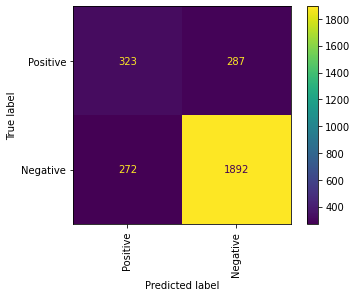

In [ ]:
#Constructing a confusion matrix to display the Evaluation metrics for the dataset using Logistic Regression.
plot_confusion_matrix(dt_model, x_test, y_test, display_labels=['Positive', 'Negative'], cmap='viridis', xticks_rotation='vertical')

### Comparing the Performance of the classification models

#### Evaluation:

The evaluation of the Review Helpfulness Classification is carried out using the Accuracy evaluation metric from sklearn. 
As we can see from the above results, 
1. The LSTM is performing well as the dropout parameter has been initialized that reduced the overfitting and improved the model performance.   
2. Training and Testing accuracies are at par which signifies that the LSTM model is performing well for the given dataset.  
3. Also, the Decision Tree model is having an accuracy of 80.67% which can be considered as a good model for predicting the given Sentiments. 
4. The hyperparameter tuning for the Decision Tree model has increased the True Positive count as can be seen in the Confusion matrix.   

   
In terms of Confusion matrix, 
1. The True Positive and True Negative Rate is very high which signifies that the model is correctly predicting the helpful and unhelpful reviews for the dataset.
2. This increase in TP and TN would ultimately increase the Precision, Recall and F1 score of the model.

### Task 3.4:Comparison results of two Classification tasks

##### Performance Comparison of Two classification tasks (i.e. Sentiment and Helpfulness classification)


We could see the below observations from the given classification tasks-  
1. Review Sentiment Classification is more useful as compared to the Review Helpfulness Classification.
2. For the given classification tasks, out of the classifiers used, LSTM performes better for the given dataset.
3. The Train and Test Accuracy of the LSTM model for Review Sentiment Classification is predominentaly high as compared to the Train and Test Accuracy of the LSTM model for Review Helpfulness Classification.
4. The TP and TN scores are at peak for the Sentiment Analysis Classification unlike for Review Helpfulness Classification ,therefore the overall Model accuracy of the Sentiment Analysis Classification is high.





## **Challenges and Conclusion:**

***Challenges***:
1. Sometimes while fetcing the webpages during data collection, it returned error. Spent considerable amount of time to debug and find root cause, hence applied retry mechanism after 3 seconds if the error occurs.
2. HTML element classes for the reviews were not identical. Some had 'review' while some had 'review-alt' as their classs. Initially spent some time in finding a generic way to include both the classes in the code flow.


***Conclusion***:

From the results, we can infer LSTM is a good model as compared to Logistic Regression for the Review Sentiment Classification task. Also, it outperforms Decision Tree Classifier for the Review Helpfulness Classification task.

All in all it was a fun and interesting project to work on and I am thankful to be a part of this wonderful learning opportunity :)